### Импорты используемых библиотек:

In [2]:
import os
import re
import nltk
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import smart_open
smart_open.open = smart_open.smart_open
import gensim
import gensim.downloader as gensim_api

Получаем список имен президентов и содержимое файлов датасета:

In [40]:
path = "../data/addresses/"

In [41]:
presidents = []
contents = []

In [42]:
for _, _, files in os.walk(path):
   for name in files:
      presidents.append(' '.join(name.split()[:2]))
        
      with open(path + name, 'r') as file:
          contents.append(file.read())

In [5]:
presidents

['Abraham Lincoln',
 'Abraham Lincoln',
 'Abraham Lincoln',
 'Abraham Lincoln',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Johnson',
 'Andrew Johnson',
 'Andrew Johnson',
 'Andrew Johnson',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Benjamin Harrison',
 'Benjamin Harrison',
 'Benjamin Harrison',
 'Benjamin Harrison',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Chester A.',
 'Chester A.',
 'Chester A.',
 'Chester A.',
 'Donald J.',
 'Donald J.',
 'Donald J.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Fran

In [43]:
for text in contents:
    print(text.split()[:10])

ens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of']
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives:', 'After', 'a']
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives:', 'The', 'continued']
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives:', 'To', 'express']
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives:', 'Upon', 'the']
['Please,', 'everybody,', 'have', 'a', 'seat.', 'Mr.', 'Speaker,', 'Mr.', 'Vice', 'President,']
['Madam', 'Speaker,', 'Mr.', 'Vice', 'President,', 'Members', 'of', 'Congress,', 'the', 'First']
['Thank', 'you.', 'Mr.', 'Speaker,', 'Mr.', 'Vice', 'President,', 'Members', 'of', 'Congress,']
['The', 'President.', 'Mr.', 'Speaker,', 'Mr.', 'Vice', 'President,', 'Members', 'of', 'Congress,']
['Mr.', 'Speaker,', 'Mr.', 'Vice', 'President,', 'Members', 'of', 'Congress,', 'distinguished', 'guests,']
['Mr.', 'Speaker,', 'Mr.', 'Vice',

In [44]:
texts = pd.DataFrame({"president": presidents, "text": contents})

In [45]:
texts

,president,text
0,Abraham Lincoln,\n Fellow-Citizens of the Senate and House of ...
1,Abraham Lincoln,\nFellow-Citizens of the Senate and House of R...
2,Abraham Lincoln,\nFellow-Citizens of the Senate and House of R...
3,Abraham Lincoln,\nFellow-Citizens of the Senate and House of R...
4,Andrew Jackson,\nFellow Citizens of the Senate and of the Hou...
...,...,...
219,Woodrow Wilson,\nGentlemen of the Congress:\nIn fulfilling at...
220,Woodrow Wilson,\nGENTLEMEN OF THE CONGRESS:\nSince I last had...
221,Woodrow Wilson,\nGENTLEMEN OF THE CONGRESS:\nWhen I addressed...
222,Woodrow Wilson,\nGentlemen of the Congress:\nThe session upon...


,text
president,
Abraham Lincoln,4
Andrew Jackson,8
Andrew Johnson,4
Barack Obama,8
Benjamin Harrison,4
Calvin Coolidge,6
Chester A.,4
Donald J.,3
Dwight D.,8


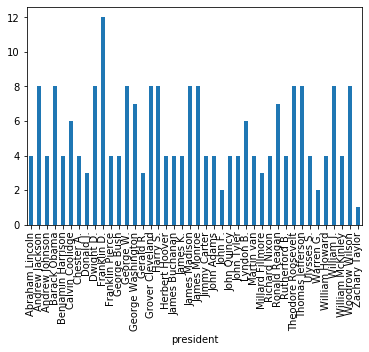

In [47]:
summary = texts.groupby("president").count()
ax = summary.plot.bar(y='text')
ax.get_legend().remove()
summary

Разобьем текст на слова:

In [48]:
words = []

for text in texts.text:
    words += re.findall('[A-Za-zА-ЯЁа-яё]+-[A-Za-zА-ЯЁа-яё]+|[A-Za-zА-ЯЁа-яё]+', text)

print(f"Total words: {len(words)}")
print(f"Unique words: {len(set(words))}")

Total words: 1893596
Unique words: 31019


In [50]:
counter=CountVectorizer(token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
res=counter.fit_transform(texts.text.tolist())

print(counter.vocabulary_)

related': 21521, 'untapped': 24845, 'stave': 22076, 'bug': 2967, 'headache': 10620, 'tames': 23002, 'engulfed': 7760, 'serbian': 20863, 'kosovo': 13037, 'wye': 26107, 'ladin': 13084, 'kenya': 12932, 'jeff': 12705, 'taliaferro': 22987, 'dominicans': 7001, 'sammy': 20279, 'sosa': 21670, 'felons': 8856, 'stalkers': 21976, 'crime-mapping': 5339, 'mug': 15013, 'juveniles': 12883, 'horrified': 11019, 'heartbroken': 10656, 'jonesboro': 12781, 'paducah': 16425, 'edinboro': 7333, 'suzann': 22831, 'passionately': 16635, 'canyons': 3223, 'warming': 25470, 'hint': 10858, 'livability': 13603, 'tutor': 24101, 'fema': 8859, 'rosa': 20067, 'ancestry': 990, 'gender': 9837, 'counts': 5209, 'energizing': 7713, 'mayflower': 14279, 'harriet': 10549, 'tubman': 24056, 'star-spangled': 22010, 'wondered': 25945, 'hopefulness': 10997, 'mountaintop': 14973, 'synagogues': 22912, 'cd': 3403, 'v-chip': 25006, 'censorship': 3438, 'upbringing': 24898, 'vchip': 25090, 'superhighway': 22657, 'designer': 6212, 'jackets'

In [3]:
fake = pd.read_csv('../data/Fake.csv', encoding="ISO-8859-1")
fake["class"] = 0
true = pd.read_csv('../data/True.csv', encoding="ISO-8859-1")
true["class"] = 1
news =pd.concat([fake, true])

In [4]:
news

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


Функция для построения словаря всех слов текста, приведенных к начальной форме:

In [5]:
def normalize(text):
    words = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)

    # Удаление стоп-слов
    stop_words = nltk.corpus.stopwords.words("english")
    words = [word for word in words if word not in stop_words]

    # Стемминг
    ps = nltk.stem.porter.PorterStemmer()
    words = [ps.stem(word) for word in words]

    # Лемматизация
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    words = [lem.lemmatize(word) for word in words]

    return " ".join(words)

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Qwerheh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Qwerheh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
news["cleaned"] = news.text.apply(lambda text: normalize(text))

In [7]:
news.head()

,title,text,subject,date,class,cleaned
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump wish american happi new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,hous intellig committe chairman devin nune go ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,On friday reveal former milwauke sheriff david...
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,On christma day donald trump announc would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope franci use annual christma day messag reb...


In [8]:
train, test = model_selection.train_test_split(news, test_size=0.2)

In [10]:
corpus = train["cleaned"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300,   
            window=8, min_count=1, sg=1, iter=30)